# Exoplanet

## Description

The aim of this exercise is to import and clean data from the [51 Pegasi](https://en.wikipedia.org/wiki/51_Pegasi) exoplanet.

You will also manipulate the data in a library called ```pandas```. From there you will plot the data and fit a curve on it in order to find a fit of the radial velocity. This can be used to find the period of the orbit.

## Exercise

To help you through the exercise, this exercise has been broken down into several tasks for you to complete.

### Task 1

The first task is to import the following libraries,

* csv
* pandas
* numpy
* curve_fit from scipy.optimize
* matplotlib.pyplot

Let matplotlib know that you're working in a notebook by calling,

```
%matplotlib notebook
```

In [2]:
#NAME: Time Period of an Exoplanet Orbit
#DESCRIPTION: Demonstrates importing, cleaning and finding best fits to data.

import csv
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
%matplotlib notebook

### Task 2

The second task involves little programming. It simply requires you to view the data you are going to process.

The data for this exercise are stored in the file: ``` exoplanets_data.txt ```. 

Set a variable named ``` filename ``` to this string.

In [3]:
filename = 'exoplanets_data.txt'

View this file inside Jupyter (access it from the filesystem). 

What line does the data start on? Store this value in a variable ``` preheader_lines ``` below.

In [4]:
preheader_lines = 21

What headers are there for the data?

Create empty lists to contain any information which you think is relevant. These will be used later to store any data you pull from the file.

In [5]:
name = []
julian_date = []
radial_velocity = []
radial_velocity_uncertainty = []
observatory = []

### Task 3

Now that we know how many lines there are before our data starts, and we have variables to read the data into, we can now look at opening the file.

We'll use the [csv](https://docs.python.org/3/library/csv.html) library that you imported earlier.
Look up how to load data from a csv file for use in a Python script.

You'll need to work with the rows after ```preheader_lines``` (try using an ```if``` statement).
Print some of the rows and have a look at what comes out. How is this data formatted?

Come up with a way to take the csv data and place them in their respective variables. This step involves you cleaning the data (so it might be worth using a pen and paper to write down your thoughts!).

Have a look at the names of the stars, can you come up with a way to concisely place them in the name list?

Keywords for this section: ```enumerate```, ```list reversal```.

In [6]:
with open(filename, 'r') as csvfile:
    delim = ' '
    csvreader = csv.reader(csvfile, delimiter=delim)
    for i, row in enumerate(csvreader):
        if i > preheader_lines:
            parsed_row = []
            for element in row[::-1]:
                if element:
                    parsed_row.append(element)
            name.append(' '.join(parsed_row[4:][::-1]))
            julian_date.append(float(parsed_row[3]))
            radial_velocity.append(float(parsed_row[2]))
            radial_velocity_uncertainty.append(float(parsed_row[1]))

### Task 4

Now, we're going to use the python library [pandas](http://pandas.pydata.org/).

Pandas provides the ability to work with large data sets quickly, without having to write many additional methods for sorting the data.

The first thing to do is to load the lists into a pandas [```Data Frame```](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html).

In [7]:
df = pd.DataFrame({ 'Star Name': name,
                    'Julian Date': julian_date, 
                    'Radial Velocity': radial_velocity,
                    'Uncertainty': radial_velocity_uncertainty })

To sort through the data, we can create a [```mask```](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.mask.html).

Create the variables ```starname```, ```date_start```, and ```date_end```. Give them the values '51 Peg', 10010, 10035, respectively.

To create a variable ```mask```, select for the stars with ```starname```, in the date range between ```date_start``` and ```date_end```.

In [11]:
starname = '51 Peg'
date_start = 10010
date_end = 10035
mask = (df['Star Name'] == starname) & (df['Julian Date'] > date_start) & (df['Julian Date'] < date_end)

Use the ```mask``` with [DataFrame.loc](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.loc.html) to plot (you can plot directly using pandas) the data - with its uncertainty - in the date range given.

Now, let's try to fit the data. 

Write a function ```sin_fit```, which takes the arguments ```omega``` (the angular frequency), ```phi``` (the phase), ```amplitude```, and ```disp```. This function should return a sinusoidal function using the input information.

Use the [```curve_fit```](http://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html) function to fit the data. Read up on how to specify the initial parameters.

Plot the data first, and write down your estimate of the period of the planet's orbit. Use this to make your initial estimate of the angular frequency.

Plot the fitted data to the graph (use a linspace to create the time data).

<IPython.core.display.Javascript object>


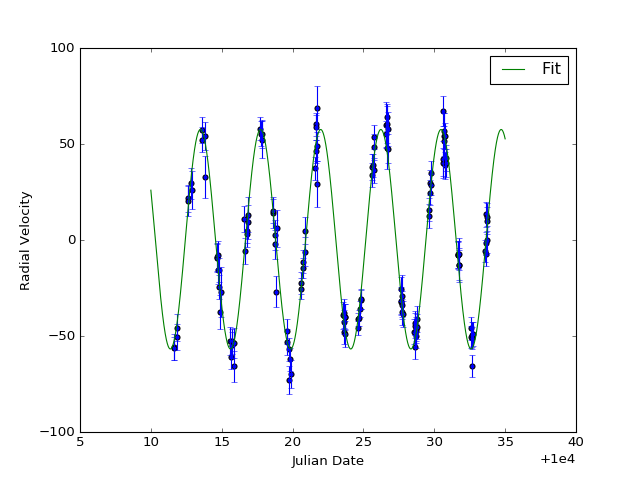

In [12]:
df.loc[mask].plot(x='Julian Date', y='Radial Velocity', yerr='Uncertainty', kind='scatter')

# Omega - angular frequency, phi - phase shift
def sin_fit(t, omega, phi, amplitude, disp):
    return amplitude*np.sin(omega*t + phi) + disp
period = 4.230785
initial_params = [0.5*np.pi, -np.pi, 60, 0]
fit = curve_fit(sin_fit, 
                df.loc[mask]['Julian Date'].tolist(), 
                df.loc[mask]['Radial Velocity'].tolist(), 
                sigma=df.loc[mask]['Uncertainty'].tolist(),
                absolute_sigma=True,
                p0=initial_params
                )
t = np.linspace(date_start, date_end, 10**4)
plt.plot(t, sin_fit(t, fit[0][0], fit[0][1], fit[0][2], fit[0][3]), label='Fit')
    
plt.legend()

Print the period of the orbit below.

In [10]:
print("Period of Orbit/Days:", 2*np.pi/fit[0][0])

Period of Orbit/Days: 4.2445767362
